<a href="https://colab.research.google.com/github/unnati0123/CropClassification-using-LogisticRegression/blob/main/Crop_detection_using_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import cv2

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Agriculture Crops  data/archive (2)/Crop_details.csv')
df.head()

,Unnamed: 0,path,crop,croplabel
0,0,/kaggle/input/kag2/sugarcane/sugarcane037ahs.jpeg,sugarcane,3
1,1,/kaggle/input/kag2/sugarcane/sugarcane034a.jpeg,sugarcane,3
2,2,/kaggle/input/kag2/sugarcane/sugarcane032arot....,sugarcane,3
3,3,/kaggle/input/kag2/sugarcane/sugarcane036ahs.jpeg,sugarcane,3
4,4,/kaggle/input/kag2/sugarcane/sugarcane023ahs.jpeg,sugarcane,3


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

In [ ]:
df.isna().sum()

Unnamed: 0    0
path          0
crop          0
croplabel     0
dtype: int64

Text(0.5, 1.0, 'wheat')

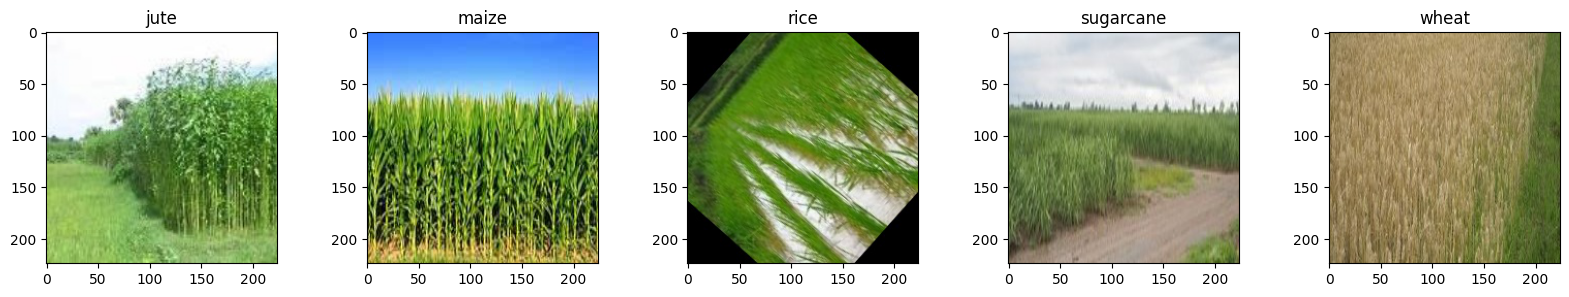

In [ ]:
wheat = plt.imread("/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/wheat/wheat0001a.jpeg")
jute = plt.imread("/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/jute/jute001ahs.jpeg")
cane = plt.imread("/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/sugarcane/sugarcane0001a.jpeg")
rice = plt.imread("/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/rice/rice001arot.jpeg")
maize = plt.imread("/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/maize/maize002a.jpeg")
plt.figure(figsize=(20,3))
plt.subplot(1,5,1)
plt.imshow(jute)
plt.title("jute")
plt.subplot(1,5,2)
plt.imshow(maize)
plt.title("maize")
plt.subplot(1,5,3)
plt.imshow(rice)
plt.title("rice")
plt.subplot(1,5,4)
plt.imshow(cane)
plt.title("sugarcane")
plt.subplot(1,5,5)
plt.imshow(wheat)
plt.title("wheat")

In [ ]:
jutepath = "/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/jute"
maizepath = "/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/maize"
ricepath = "/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/rice"
sugarcanepath = "/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/sugarcane"
wheatpath = "/content/drive/MyDrive/Agriculture Crops  data/archive (2)/kag2/wheat"

jutefilename = os.listdir(jutepath)
maizefilename = os.listdir(maizepath)
ricefilename = os.listdir(ricepath)
sugarcanefilename = os.listdir(sugarcanepath)
wheatfilename = os.listdir(wheatpath)

X= []

In [ ]:
for fname in jutefilename:
    X.append([os.path.join(jutepath,fname),0])
for fname in maizefilename:
    X.append([os.path.join(maizepath,fname),1])
for fname in ricefilename:
    X.append([os.path.join(ricepath,fname),2])
for fname in sugarcanefilename:
    X.append([os.path.join(sugarcanepath,fname),3]) 
for fname in wheatfilename:
    X.append([os.path.join(wheatpath,fname),4])  
X = pd.DataFrame(X,columns = ['path','labels'])    


In [ ]:
X.head()

,path,labels
0,/content/drive/MyDrive/Agriculture Crops data...,0
1,/content/drive/MyDrive/Agriculture Crops data...,0
2,/content/drive/MyDrive/Agriculture Crops data...,0
3,/content/drive/MyDrive/Agriculture Crops data...,0
4,/content/drive/MyDrive/Agriculture Crops data...,0


In [ ]:
ohencoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohlabel = pd.DataFrame(ohencoder.fit_transform(X[['labels']]),dtype = 'int64',columns = ['label0','label1','label2','label3','label4'])
label_X = X.copy()
X = pd.concat([X,ohlabel],axis = 1)
new_X = X.drop(['labels'],axis = 1)

In [ ]:
train,test = train_test_split(label_X,test_size=0.2)

In [ ]:
X_train = train['path'].values
y_train = train.drop(['path'],axis=1).values
X_test = test['path'].values
y_test = test.drop(['path'],axis=1).values

In [ ]:
def flat_x(data):
    flat = []
    for i in data:
        img = plt.imread(i)
        if img.shape != (224,224,3):
            img = cv2.resize(img, (224,224))
        img = img/255
        flat.append(img.reshape([1,-1]))
    flat =  np.array(flat)    
    flat = flat.reshape(-1,224*224*3)       
    return flat


In [ ]:
flat_X_train = flat_x(X_train)
flat_X_test = flat_x(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(flat_X_train,np.ravel(y_train))

LogisticRegression()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(flat_X_train)
print(flat_X_train.shape)
print(X_train_pca.shape)

(643, 150528)
(643, 2)


In [ ]:
lr.score(flat_X_test,np.ravel(y_test))

0.8385093167701864

In [ ]:
def modelpipeline(imagepath,model = lr,label=-1):
    pdict = {0:"jute",1:"maize",2:"rice",3:"sugarcane",4:"wheat"}
    pred_x = flat_x([imagepath])
    pred = model.predict(pred_x)
    plt.imshow(plt.imread(imagepath))
    if (label!=-1):
        plt.title("prediction : {} \naccurate  : {}".format(pdict[pred[0]],pdict[label]))
    else:
        plt.title("prediction : {}".format(pdict[pred[0]]))

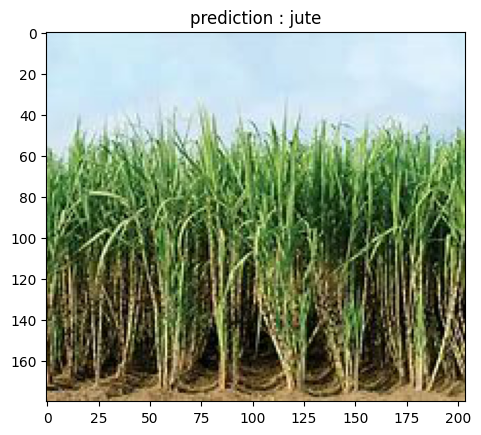

In [ ]:
modelpipeline('/content/drive/MyDrive/Agriculture Crops  data/archive (2)/agri test data/cane2.jpg')

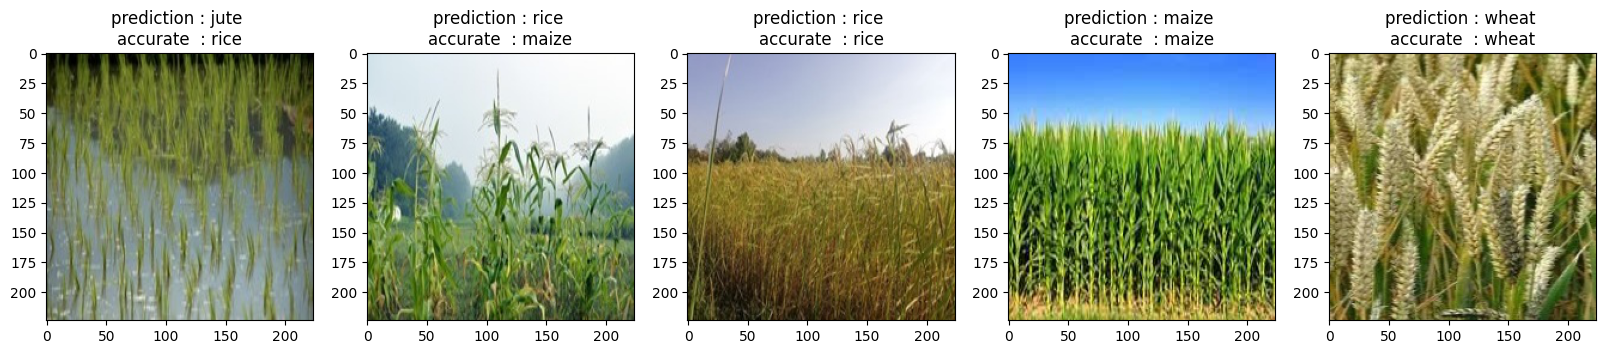

In [ ]:
plt.figure(figsize=(20,20))
for num,path in enumerate(X_test[0:5]):
    plt.subplot(4,5,num+1)
    modelpipeline(path,lr,y_test[num][0])

In [ ]:
test_accuracy = lr.score(flat_X_test, np.ravel(y_test))
print('Testing accuracy:', test_accuracy)

Testing accuracy: 0.8385093167701864
